In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 

In [15]:
import glob

In [16]:
glob.glob(r'C:\Users\alona\Desktop\Data analytics\S&P_resources\individual_stocks_5yr/*csv')

['C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\alon

In [17]:
len(glob.glob(r'C:\Users\alona\Desktop\Data analytics\S&P_resources\individual_stocks_5yr/*csv'))

505

In [18]:
company_list = [
    r'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv' , 
    r'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv' , 
    r'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv' , 
    r'C:\\Users\\alona\\Desktop\\Data analytics\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv'
    
]
## Extracting only the Datasets of Apple, Amazon, Google and Microsoft

In [19]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
## A Warnings package to get rid of any future warnings

In [20]:
all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    
    all_data = current_df.append(all_data , ignore_index=True)
## Collects data from various files

In [21]:
all_data.shape

(4752, 7)

In [23]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [24]:
all_data.isnull()
##Checks for values with null

,date,open,high,low,close,volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4747,False,False,False,False,False,False,False
4748,False,False,False,False,False,False,False
4749,False,False,False,False,False,False,False
4750,False,False,False,False,False,False,False


In [25]:
all_data.isnull().sum()
## Shows there are no missing values in a our dataframe

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [28]:
all_data.dtypes
## Shows all columns data types
## We need to change the 'date' column to a datetime type

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [30]:
all_data['date']=pd.to_datetime(all_data['date'])
## Changes 'date' row into a datetime type

In [31]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [32]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [34]:
tech_list= all_data['Name'].unique()
## Puts the 'Name' column in all_data into a variale

In [37]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

# Analyzing Stock Price Changes Over Time

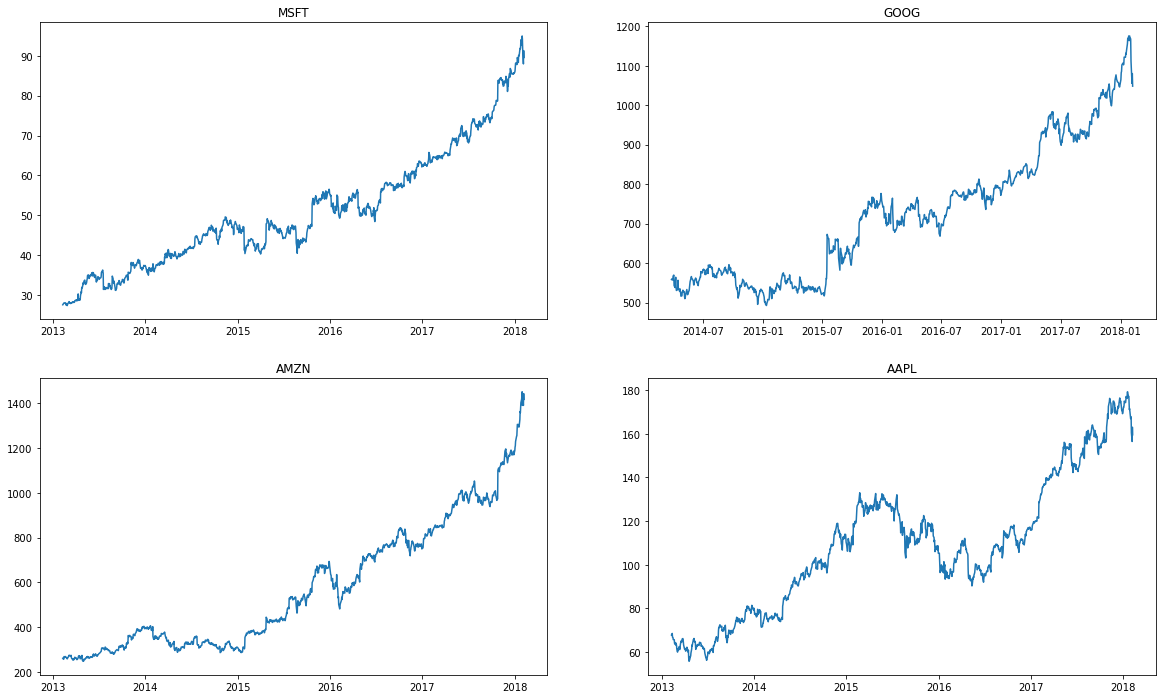

In [41]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list, 1): 
    plt.subplot(2 ,2 , index)
    filter1=all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'], df ['close'])
    plt.title(company)
## Each subplot visualies the closing stock price over time for each of the 4 companies

# Moving Average Analysis in Stock Market Data Analytics

In [42]:
## What was the moving average of the various stocks?

In [43]:
all_data['close'].rolling(window=10).mean().head(14)
## calculates a 10-day moving average of the 'close' price column

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [45]:
new_data = all_data.copy()

In [51]:
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()
## A loop that calculates multiple moving avrages for the 'close' price column and stores each in a new named column

In [47]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,172.9460
4746,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,172.8726
4747,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [48]:
new_data.set_index('date' , inplace=True)

In [49]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026


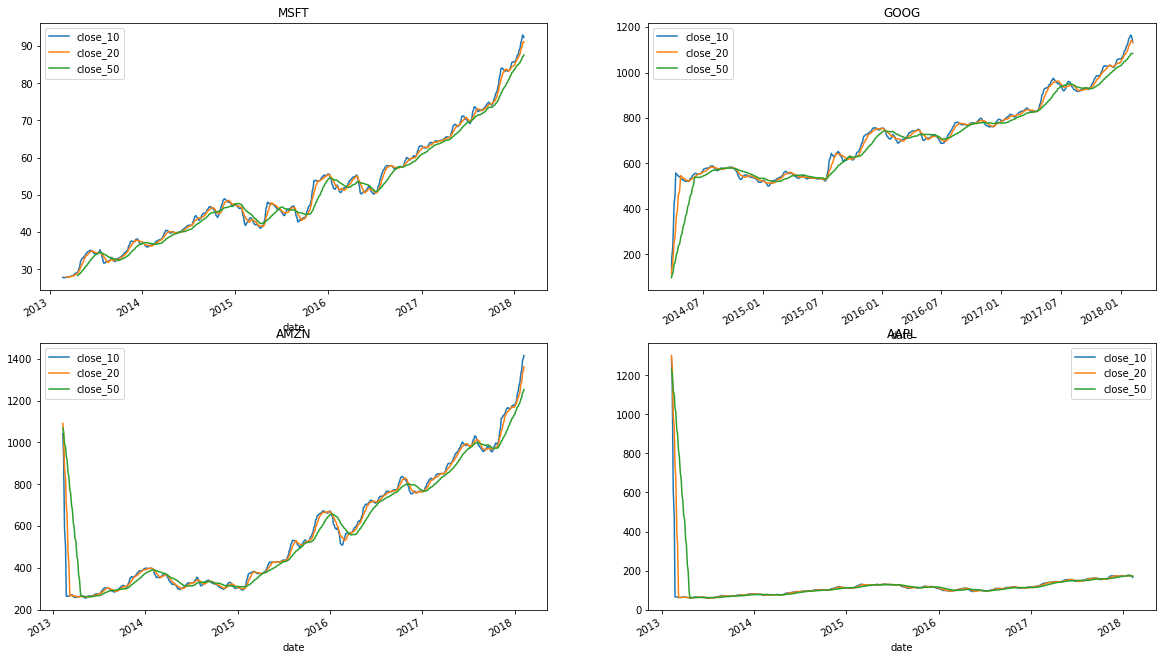

In [52]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)
## Conclussions:
## 1: The close_10 (10-day MA) is the most responsive to short-term price fluctuations, showing more volatility and tracking the immediate price direction closely.
## 2: The close_50 (50-day MA) is the smoothest line, filtering out short-term noise and providing a clearer indication of the longer-term trend.
## 3:  The close_20 (20-day MA) sits between the 10-day and 50-day, offering a balance between responsiveness and smoothing.

# Observing Closing Price Change in Apple Stock

In [72]:
company_list

['C:\\\\Users\\\\alona\\\\Desktop\\\\Data analytics\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\alona\\\\Desktop\\\\Data analytics\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\alona\\\\Desktop\\\\Data analytics\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\alona\\\\Desktop\\\\Data analytics\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [73]:
apple = pd.read_csv(r'C:\\\\Users\\\\alona\\\\Desktop\\\\Data analytics\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv')
## Creates a new dataframe for the company Apple

In [74]:
apple ['Daily return (in%)'] = apple['close'].pct_change()*100
## Creates a new row that shows the percentage change between the current and prior element

In [75]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return (in%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [76]:
import plotly.express as px

In [77]:
px.line(apple , x="date" , y="Daily return (in%)") 

## This is a better chart to use as you can hover over to see the specific change for each date but for some reason it won't work, so I created another chart in the code below

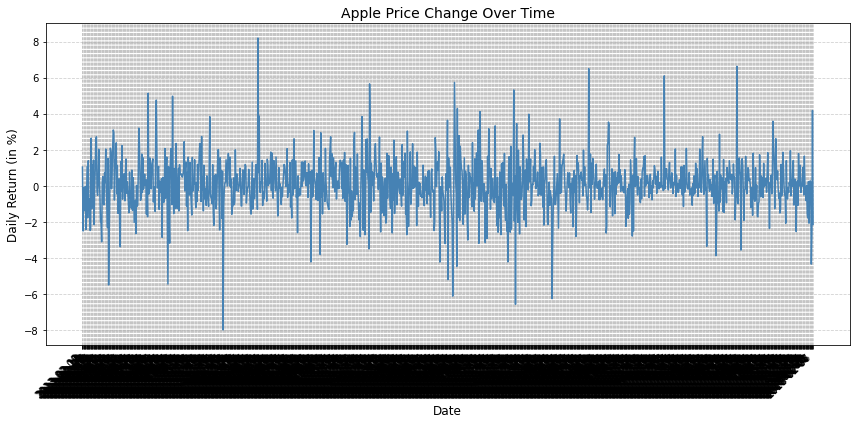

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(apple['date'], apple['Daily return (in%)'], color='steelblue', linestyle='-', marker='')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return (in %)', fontsize=12)
plt.title('Apple Price Change Over Time', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
## 

# Performing Resampling Analysis of Closing Price

In [89]:
apple['date']=pd.to_datetime(apple['date'])

KeyError: 'date'

In [84]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return (in%)           float64
dtype: object

In [88]:
apple.set_index('date', inplace=True)
## Converts the 'date' column of your apple DataFrame into the DataFrame's index

KeyError: "None of ['date'] are in the columns"

In [86]:
apple.head(4)

,open,high,low,close,volume,Name,Daily return (in%)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [92]:
apple['close'].resample('M').mean()
## Resamples the average close price to a monthly basis

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

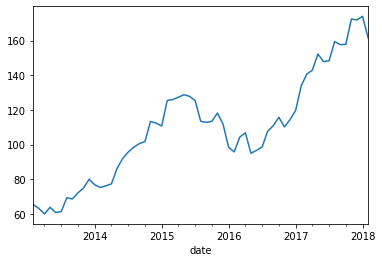

In [93]:
apple['close'].resample('M').mean().plot()

In [94]:
apple['close'].resample('Y').mean()
## Resamples the average closing price on a yearly basis

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

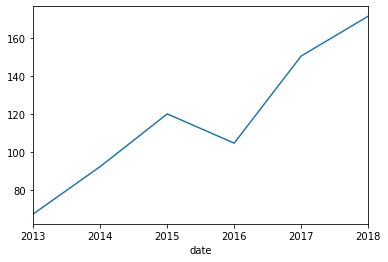

In [95]:
apple['close'].resample('Y').mean().plot()

In [96]:
apple['close'].resample('Q').mean()
## ## Resamples the average closing price on a quarterly basis

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303437
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

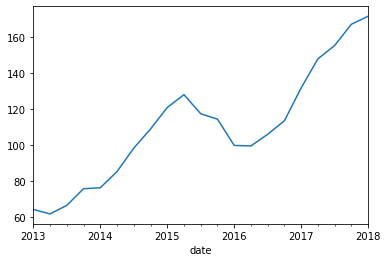

In [97]:
apple['close'].resample('Q').mean().plot()


In [98]:
## Conclusion: Apple's stock price had a small drop between 2015 to 2016 but as been on a rise ever since

# The Correlation Between the Closing Prices of Each of the 4 Companies

In [114]:
## Checking if the closing prices of the 4 companies are correlated or not

In [115]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])
## Reads each company into its own dataframe from the company_list dataframe

In [116]:
closing_price = pd.DataFrame()
## Creates a new dataframe where we will put the 'close' column of each company

In [117]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']
## Puts each companies 'close' column into the closing_price dataframe

In [118]:
closing_price.head(3)

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88


In [119]:
closing_price[['apple_close', 'amzn_close', 'google_close', 'msft_close']].corr()
## Checks for the correlation between each company's closing price
## Conclusion: 
## 1. Amazon and Microsoft's closing price are very similar as they have the highest correlation (0.95)
## 2. Google's closing price has the lowest correlation with Apple's closing price (0.64)

,apple_close,amzn_close,google_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


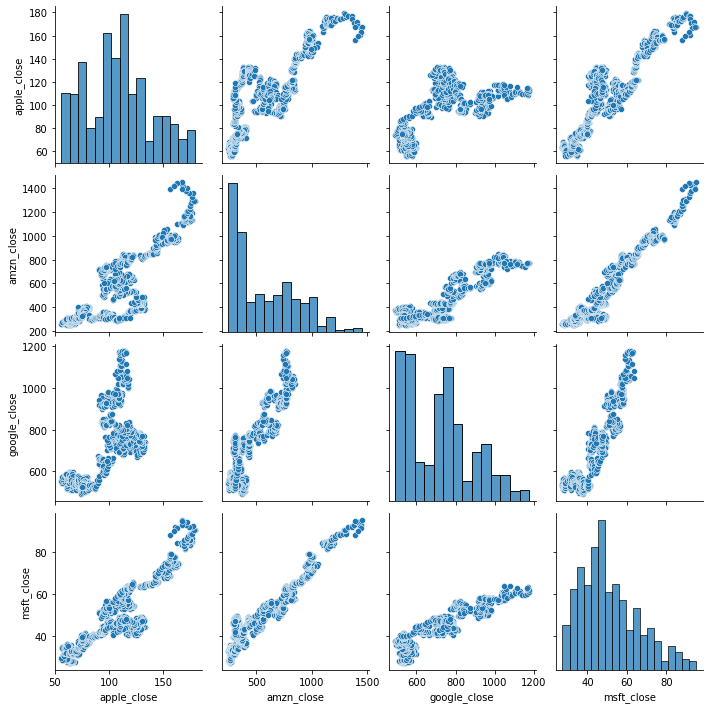

In [120]:
sns.pairplot(closing_price)
## A scatter plot to visualize the correlation's between each company

<AxesSubplot:>

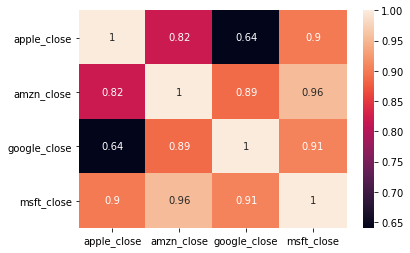

In [121]:
sns.heatmap(closing_price.corr(), annot=True)
## A heatmap showing the correlations between eahc company

# Additional Correlation Analysis

In [159]:
## Are the daily changes in closing prices or daily returns correlated or not?

In [160]:
closing_price['app_daily_return']= app['close'].pct_change()*100
closing_price['amzn_daily_return']=  amzn['close'].pct_change()*100
closing_price['google_daily_return']= google['close'].pct_change()*100
closing_price['msft_daily_return']= msft['close'].pct_change()*100
## Creates a new row in he closing_price dataframe that shows the percentage change between the current and prior element

In [161]:
closing_price.head(4)

,apple_close,amzn_close,google_close,msft_close,app_daily_return,amzn_daily_return,google_daily_return,msft_daily_return
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020


In [162]:
closing_price[['app_daily_return', 'amzn_daily_return', 'google_daily_return', 'msft_daily_return']].corr()
## Checks for the correlation between each company's daily returns
## Conclusion: 
## 1. Microsoft daily reurn has the highest correlation with Amazon's daily return, which means when one of their stock prices changes for the good or the bad, there is a 40% chance the others will too

,app_daily_return,amzn_daily_return,google_daily_return,msft_daily_return
app_daily_return,1.000000,0.287659,0.036202,0.366598
amzn_daily_return,0.287659,1.000000,0.027698,0.402678
google_daily_return,0.036202,0.027698,1.000000,0.038939
msft_daily_return,0.366598,0.402678,0.038939,1.000000


In [163]:
closing_p = closing_price[['app_daily_return', 'amzn_daily_return', 'google_daily_return', 'msft_daily_return']] 

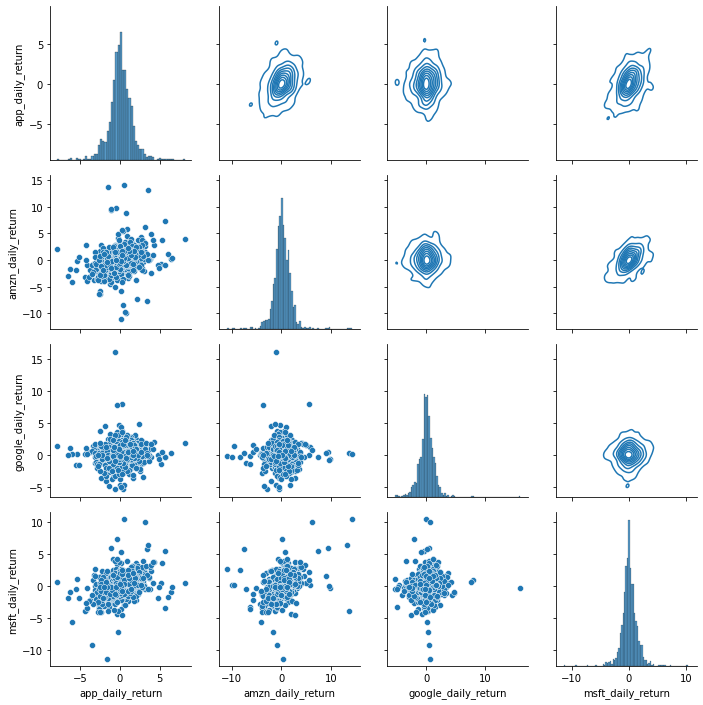

In [164]:
g = sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
## A plot to visualize the correlation's between each company